In [7]:
#импорт библиотек
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle

In [8]:
#загрузка данных
df_merged = pd.read_excel("../Data/ds_merged.xlsx ")
df_merged = df_merged.drop(['Unnamed: 0'], axis =1)

df_initial = pd.read_excel("../Data/ds_initial.xlsx ")
df_initial = df_initial.drop(['Unnamed: 0'], axis =1)

df_generated = pd.read_excel("../Data/ds_generated.xlsx ")
df_generated = df_generated.drop(['Unnamed: 0'], axis =1)

In [9]:
#менять датасет тут
df = df_initial

X=df.iloc[:,:4].to_numpy()
y=df.iloc[:,4:].to_numpy()


In [10]:

def plot_result(y_train,y_train_pred, y_test, y_pred):
    fig,axs = plt.subplots(figsize=(16,4), ncols=3)
    axs[0].scatter(y_train, y_train_pred)
    axs[0].set_title('train data')

    axs[1].scatter(y_pred, y_test, label="test data")
    axs[1].set_title('test data')
    err=y_pred - y_test
    axs[2].scatter(err[:,0], err[:,1], label="error")
    axs[2].set_title('error (test)')

    print('mse', mean_squared_error(y_test,y_pred))
    print('mae', mean_absolute_error(y_test,y_pred))
    print('Coef of determination', r2_score(y_test,y_pred))
    #reg.score(X_test, y_test)

    #((y_test-y_pred) ** 2).mean()

In [11]:
from sklearn.ensemble import RandomForestRegressor
with open('../Saved models/rf_model_pkl.pkl', 'rb') as f:
    model = pickle.load(f, )

mse 0.0032241666666666703
mae 0.03783333333333333
Coef of determination 0.9337709828874898


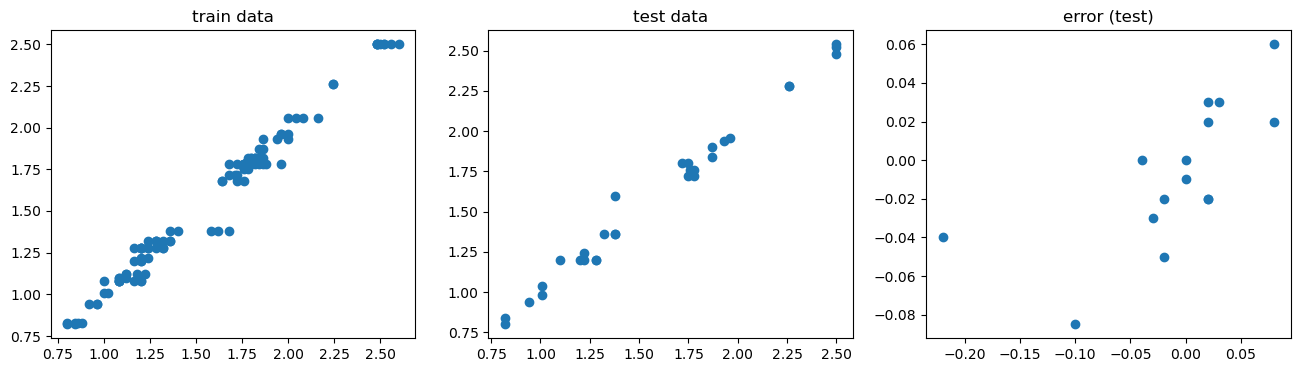

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state = 448)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
plot_result(y_train,y_train_pred, y_test, y_pred)



mse 0.0032241666666666703
mae 0.03783333333333333
Coef of determination 0.9337709828874898


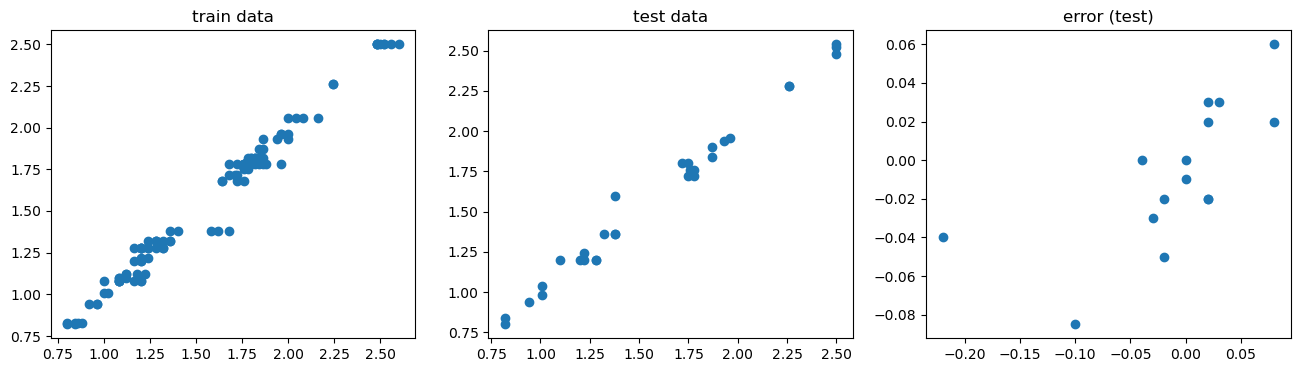

In [13]:
model2 =joblib.load('../Saved models/rf_model_jl.jl') 

y_train_pred = model2.predict(X_train)
y_pred = model2.predict(X_test)
plot_result(y_train,y_train_pred, y_test, y_pred)

array([[ 45. , 140. ,   8. ,  80. ],
       [ 45. , 140. ,   8. ,  80. ],
       [ 47. , 134. ,  10. , 110. ],
       [ 47. , 141. ,  12. ,  80. ],
       [ 47. , 134. ,  10. , 110. ],
       [ 49. , 132. ,   8. , 125. ],
       [ 45. , 140. ,   8. ,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 46. , 141. ,  10. ,  80. ],
       [ 49. , 132. ,   8. , 125. ],
       [ 44. , 146. ,   9. ,  60. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 44. , 146. ,   9. ,  60. ],
       [ 44. , 146. ,   9. ,  60. ],
       [ 44. , 146. ,   9. ,  60. ],
       [ 45. , 141. ,  10. ,  80. ],
       [ 43. , 150. ,   9. ,  50. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 48. , 131. ,  10. , 125. ],
       [ 47. , 141. ,  12. ,  80. ],
       [ 45. , 146. ,   9. ,  60. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 47. , 140. ,  10. ,  80. ],
       [ 47. , 140. ,  10. ,  80. ],
       [ 44. , 146. ,   9. ,  60. ],
       [ 47. , 140. ,  10. ,  80. ],
       [ 46. , 141. ,  10. ,  80. ],
 

In [23]:
X = np.array([ 45. , 140. ,   8. ,  80. ]).reshape(1, -1)
model = joblib.load('../Saved models/rf_model_jl.jl') 
pred = model2.predict(X)
pred

array([[1.2 , 1.96]])

In [24]:
pred[0]

array([1.2 , 1.96])

In [25]:
pred[0,1]

1.96